# Phishing Email Detector using Naive-Bayes Algorithm

We test two types of **Naive-Bayes algorithm** in this notbook (*GaussianNB & BernoulliNB*). According to our literature survey they should provide underwhelming results. This can be improved by using MulinomialNB.  

###Loading and Preprocessing

In [8]:
import pandas as pd
df=pd.read_csv('./spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


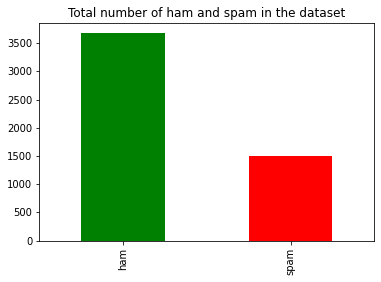

In [9]:
import matplotlib.pyplot as plt
df['label'].value_counts().plot.bar(color = ["g","r"])
plt.title('Total number of ham and spam in the dataset')
plt.show()

###Filling in null values

In [10]:
import numpy as np
df=df.replace(np.nan,'hello how are you')

###String to Vector conversion

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])
print(X.toarray())


[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**GaussianNB**
*Can perform online updates to model parameters via partial_fit. For details on algorithm used to update feature means and variance online*

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X=X.toarray()
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.3, random_state=55)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
from sklearn.metrics import accuracy_score 
accuracy_score (y_test,y_pred )

0.9594072164948454

**BernoulliNB** 
*Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.*

In [13]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score 
accuracy_score (y_test,y_pred )

0.8582474226804123